# Health Care Project

## Cardiovascular Disease Analysis EDA and Prediction

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the dataset
data = pd.read_excel('Cardiovascular_dataset.xlsx')
df = pd.DataFrame(data)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.shape

(303, 14)

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe().round(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314,0.545
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


# Data Cleaning

## Check for Duplicate values

In [9]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
df.drop_duplicates(inplace = True)
df.reset_index(drop=True,inplace =True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Check for null values

In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Checking Outliers

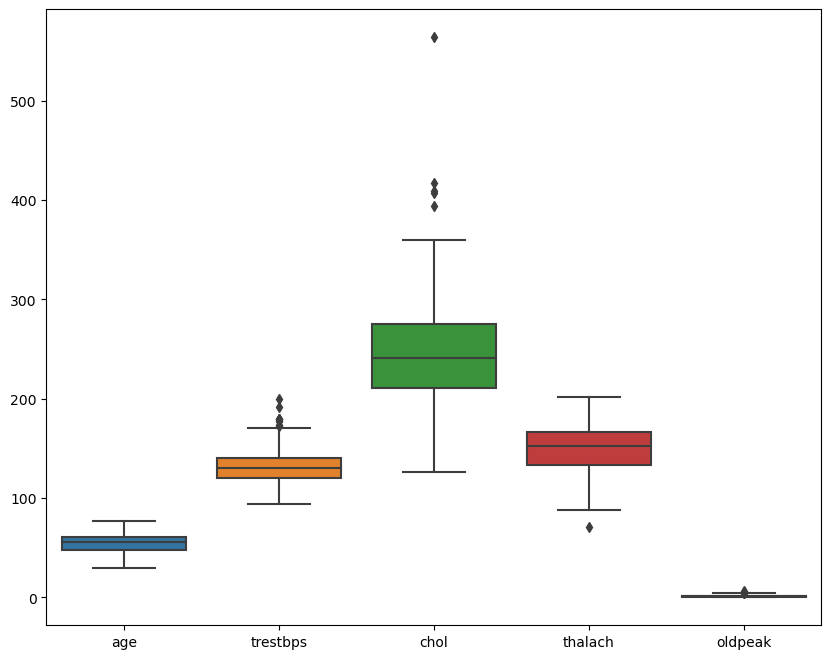

In [12]:
# Checking for the presence of outliers in numeric columns ('age','trestbps','chol','thalach','oldpeak')

plt.figure(figsize=(10,8))
sns.boxplot(data = df[['age','trestbps','chol','thalach','oldpeak']])
plt.show()

In [13]:
# Finding values of outliers(IQR method)

def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    print('the values of Q1 and Q3', Q1, Q3)
    IQR = Q3-Q1
    lower = Q1-(1.5*IQR)
    upper = Q3+(1.5*IQR)
    print('The lower and upper',lower,upper)
    for i in data:
        if (i<lower or i>upper):
            outlier_list.append(i)
    return outlier_list


for i in ['age','trestbps','chol','thalach','oldpeak']:
    outliers = detect_outliers_iqr(df[i])
    print('Outliers in',i,'attribute :',outliers)

the values of Q1 and Q3 48.0 61.0
The lower and upper 28.5 80.5
Outliers in age attribute : []
the values of Q1 and Q3 120.0 140.0
The lower and upper 90.0 170.0
Outliers in trestbps attribute : [172, 174, 178, 178, 180, 180, 180, 192, 200]
the values of Q1 and Q3 211.0 274.75
The lower and upper 115.375 370.375
Outliers in chol attribute : [394, 407, 409, 417, 564]
the values of Q1 and Q3 133.25 166.0
The lower and upper 84.125 215.125
Outliers in thalach attribute : [71]
the values of Q1 and Q3 0.0 1.6
The lower and upper -2.4000000000000004 4.0
Outliers in oldpeak attribute : [4.2, 4.2, 4.4, 5.6, 6.2]


In [14]:
# Handling outliers using Quantile based flooring and capping method.
# the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value
# Computing 10th, 90th percentiles and replacing the outliers

def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1
    
    
for i in ['trestbps','chol','thalach','oldpeak']:
    df[i]=handle_outliers(df[i])

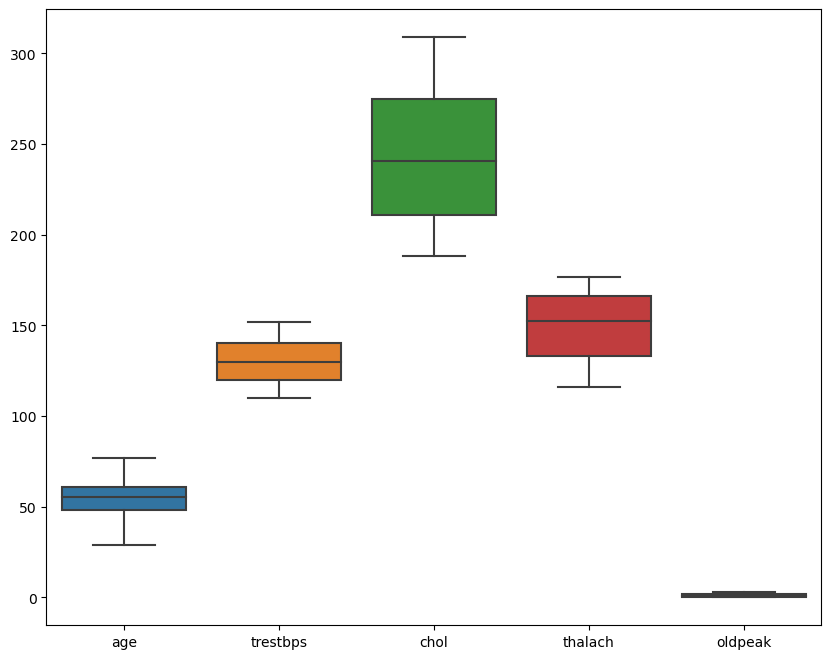

In [15]:
# verifying again with boxplot
plt.figure(figsize=(10,8))
sns.boxplot(data = df[['age','trestbps','chol','thalach','oldpeak']])
plt.show()

In [16]:
df.shape

(302, 14)

# Visualization

## Univariate Analysis

In this section, we will get an idea about our patients by considering all the features separately.

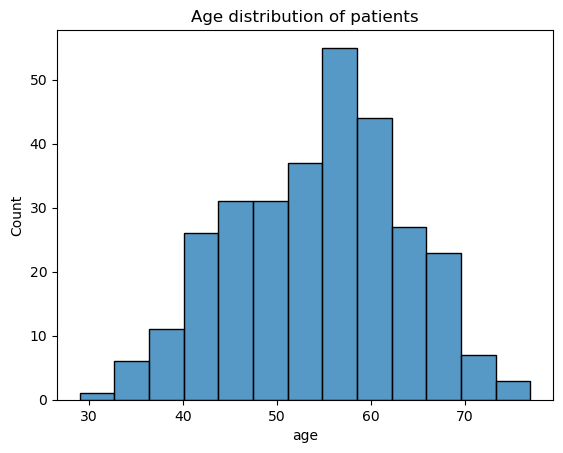

In [17]:
sns.histplot(df.age)
plt.title('Age distribution of patients')
plt.show()

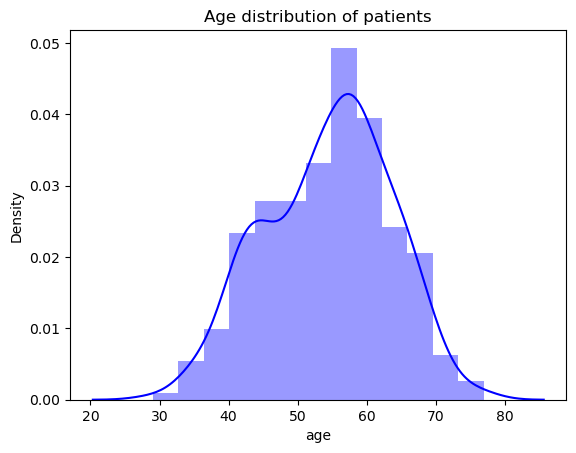

In [18]:
sns.distplot(df['age'],color='blue')
plt.title('Age distribution of patients')
plt.show()

The dataset contains information about older patients, which is to be expected. The majority of the patients are older than 40.  The peak is at 57-60 years old.

In [19]:
#Gender
s_v = df.sex.value_counts().values
s_i = df.sex.value_counts().index

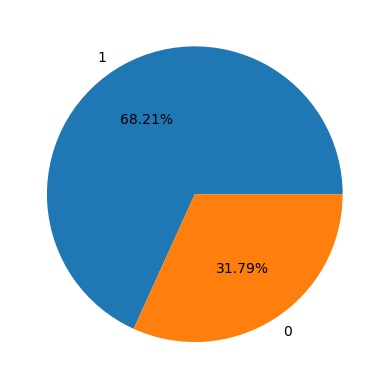

In [20]:
plt.pie(s_v,labels=s_i,autopct='%1.2f%%')
plt.show()

1 = Male

0 = Female

We have two times more Males than Females

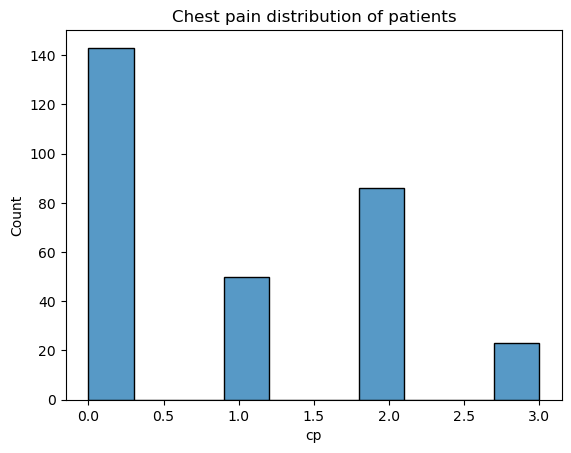

In [21]:
#Chest pain
sns.histplot(df.cp)
plt.title('Chest pain distribution of patients')
plt.show()

1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic

Almost a half of the patients have no pain in the chest

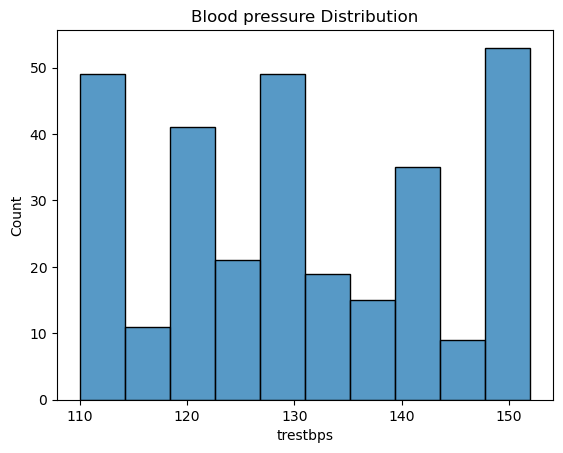

In [22]:
#Blood pressure 
sns.histplot(data = df.trestbps)
plt.title('Blood pressure Distribution')
plt.show()

According to the European Society of Cardiology, the following classification for blood pressure is applied:

        Category           Blood pressure

        Optimal	              < 120

        Normal	              120–129

        High normal	         130–139

        Grade 1 hypertension	140–159

        Grade 2 hypertension	160–179

        Grade 3 hypertension	 ≥ 180

In our dataset, the resting blood pressure distribution has a peak at a value of approx. 150

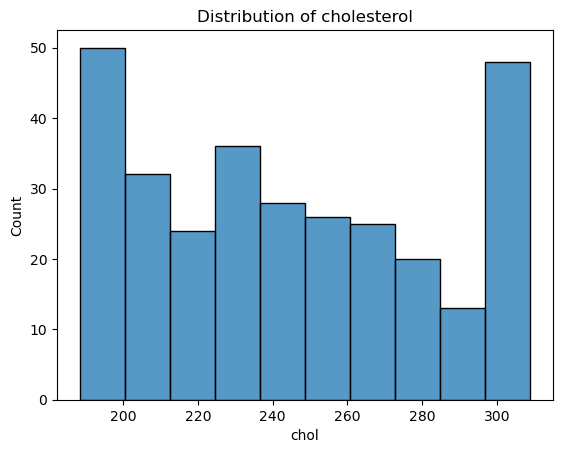

In [23]:
#cholesterol
sns.histplot(data=df.chol)
plt.title('Distribution of cholesterol')
plt.show()

The following interpretation of cholesterol level is usually used:

     Cholesterol     mg/dl	Interpretation

     < 200	            Desirable

     200-239            Borderline

     > 240	            High

In our dataset some patients have an extremely high level of cholesterol.

In [24]:
#Fasting blood sugar
df.fbs.value_counts()

0    257
1     45
Name: fbs, dtype: int64

Reminder: 0 means less or equal to 120 mg/dl (which is good), 1 means higher than 120 mg/dl.

The majority of the patients don't have serious sugar problems.

In [25]:
df.restecg.value_counts()

1    151
0    147
2      4
Name: restecg, dtype: int64

0 = normal; 1 = hypertrophy; 2 = having ST-T wave abnormality

About 50% of the patients have hypertrophy. Only a few of the patients have ST-T wave abnormality. The rest of them have normal results.

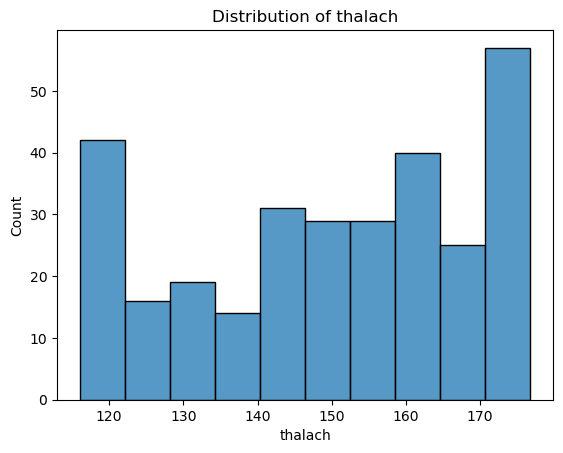

In [26]:
sns.histplot(df.thalach)
plt.title('Distribution of thalach')
plt.show()

In our dataset ,the highest value of thalach is in between 170-175 (The person’s maximum heart rate achieved)

In [27]:
df.exang.value_counts()

0    203
1     99
Name: exang, dtype: int64

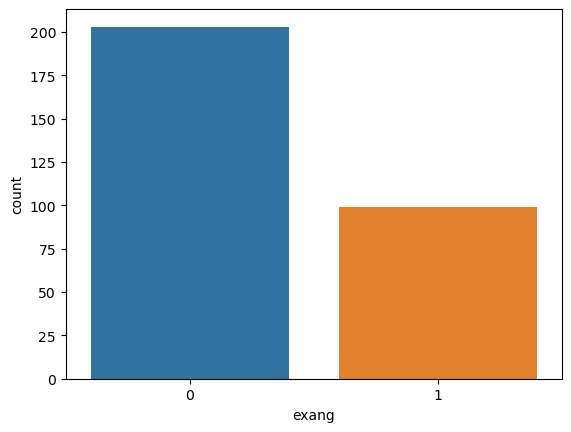

In [28]:
sns.countplot(x='exang',data=df)
plt.show()

Exercise induced angina (1 = yes; 0 = no)

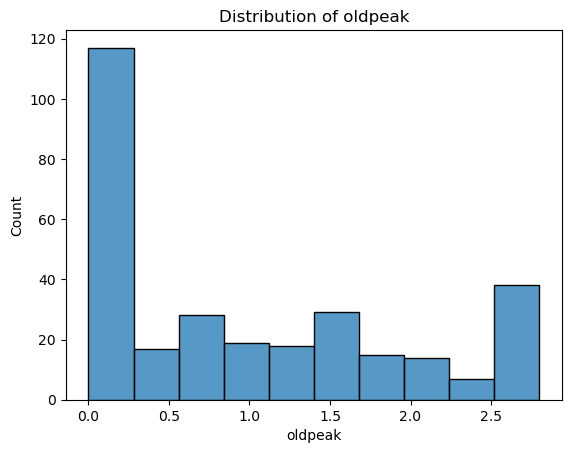

In [29]:
sns.histplot(df.oldpeak)
plt.title('Distribution of oldpeak')
plt.show()

ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot.)

In [30]:
df.slope.value_counts()

2    141
1    140
0     21
Name: slope, dtype: int64

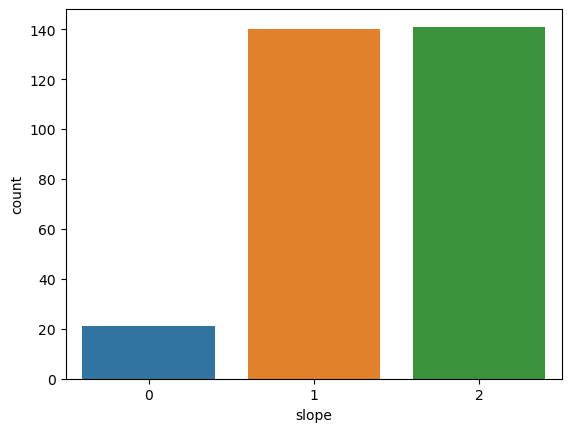

In [31]:
sns.countplot(x='slope',data=df)
plt.show()

0: downsloping     1: flat     2: upsloping

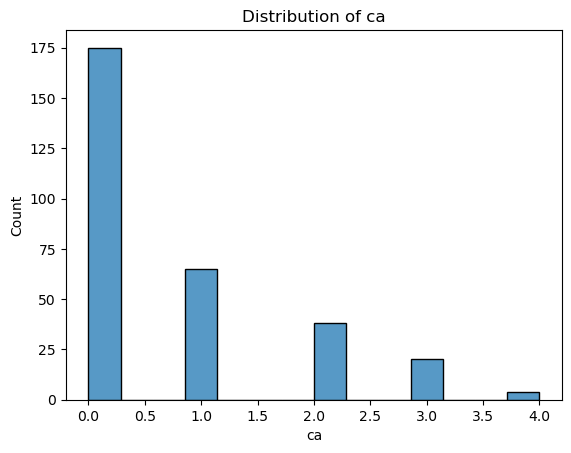

In [32]:
sns.histplot(df.ca)
plt.title('Distribution of ca')
plt.show()

Calcium test score,A normal calcium test score is zero.

In our dataset more than 50% of patients having zero score means there is no evidence of heart disease.

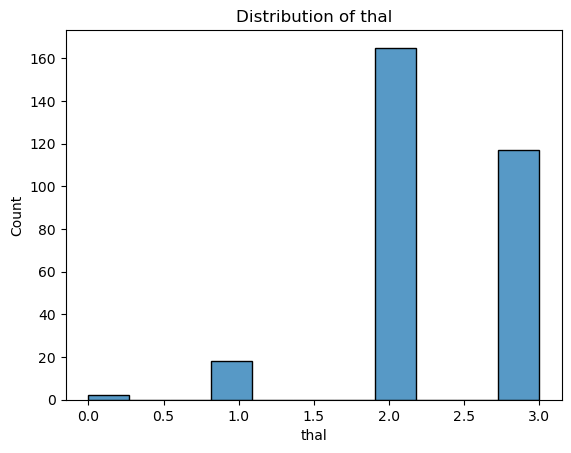

In [33]:
sns.histplot(df.thal)
plt.title('Distribution of thal')
plt.show()

A blood disorder called thalassemia

Value 0: Null

Value 1: fixed defect (no blood flow in some part of the heart)

Value 2: normal blood flow

Value 3: reversible defect (a blood flow is observed but it is not normal)

In [34]:
df.target.value_counts()

1    164
0    138
Name: target, dtype: int64

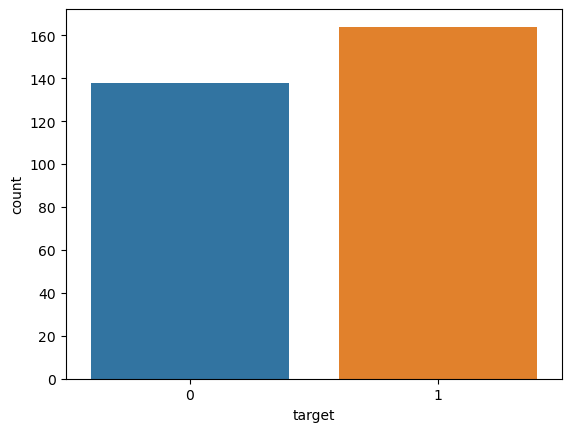

In [35]:
sns.countplot(x='target',data=df)
plt.show()

 0 = less chance of heart attack; 1 = more chance of heart attack

56.67% of the patients have a high risk of heart attack, 43.33% - low risk of a heart attack.(target value is balanced)

The conclusion is that people with good health condition has a lower chance to a heart attack.

## Bivariate Analysis

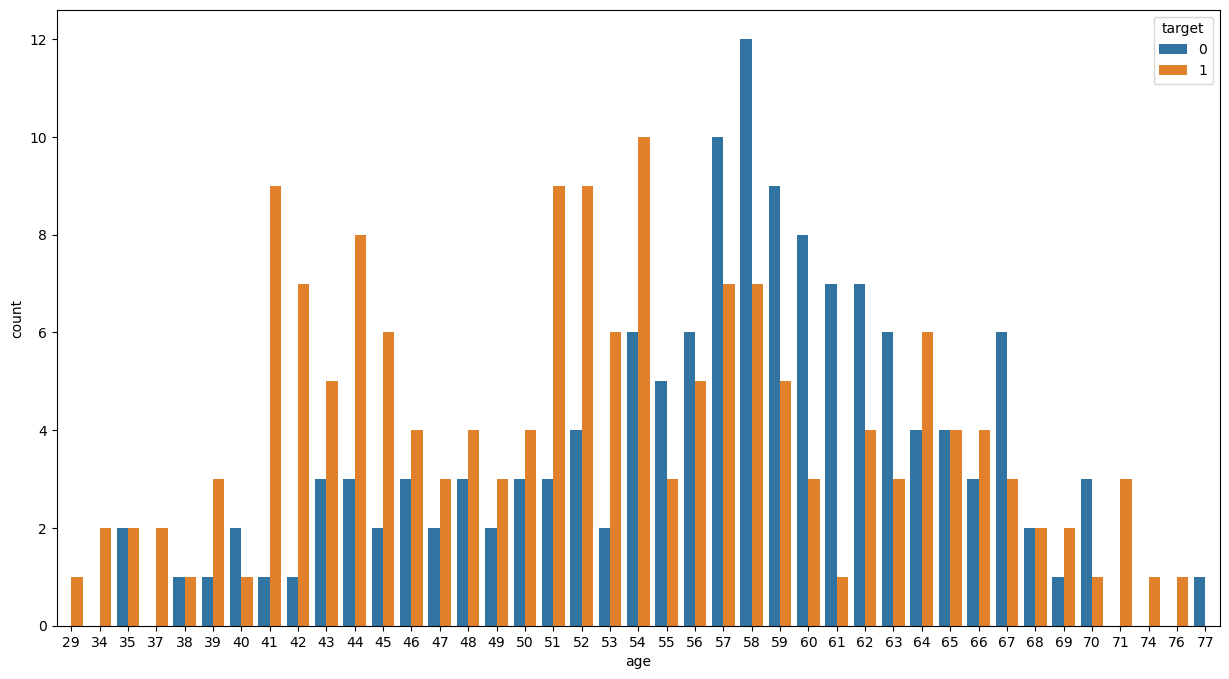

In [36]:
plt.figure(figsize=(15,8))
sns.countplot(x='age',data=df,hue='target')
plt.show()

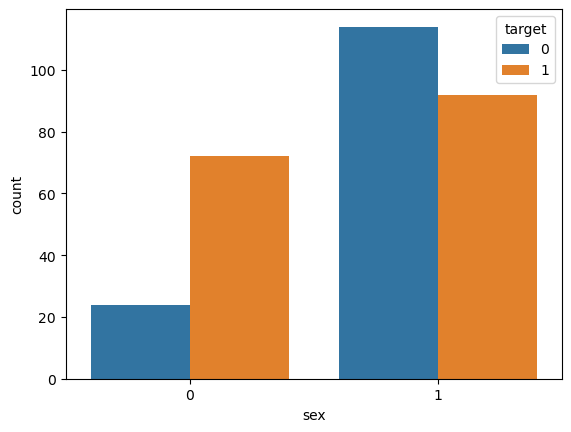

In [37]:
sns.countplot(x='sex',data=df,hue='target')
plt.show()

Females are more prone to heart attack compared to Males.

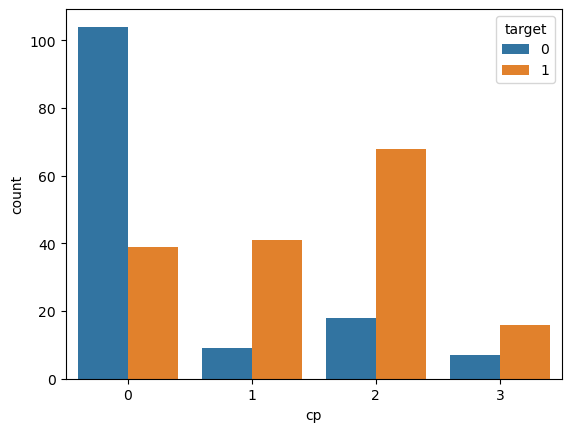

In [38]:
sns.countplot(x='cp',data=df,hue='target')
plt.show()

1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic

Most of the patients are having chest pain before getting heart attack,Especially people who having (atypical angina) are more prone to get heart attack. Almost all types of chest pains (1,2,3)except 0 type,are more prone to heart attack.

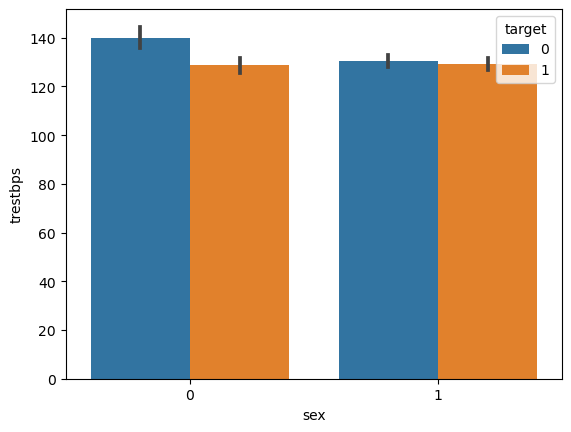

In [39]:
sns.barplot(x='sex',y='trestbps',hue='target',data=df)
plt.show()

In both Females and Males at the time of heartattack Blood pressure almost same.

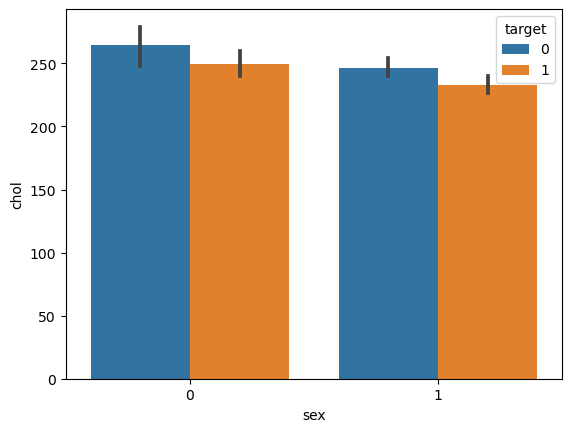

In [40]:
sns.barplot(x='sex',y='chol',hue='target',data=df)
plt.show()

People who are prone to heartattack,Females are having more cholestrol compared to Males

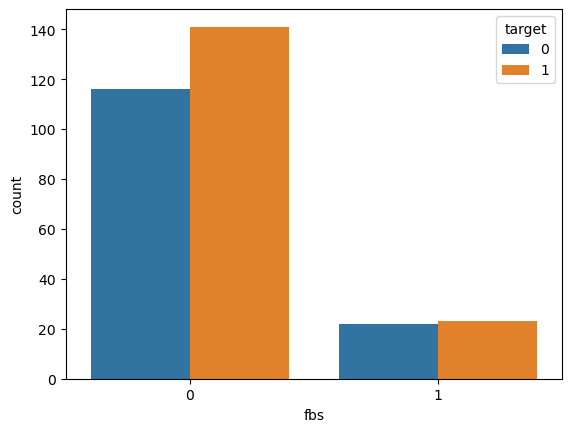

In [41]:
sns.countplot(x='fbs',hue='target',data=df)
plt.show()

Majority of the patients don't have suger problems,Still people are prone to Heartattack.

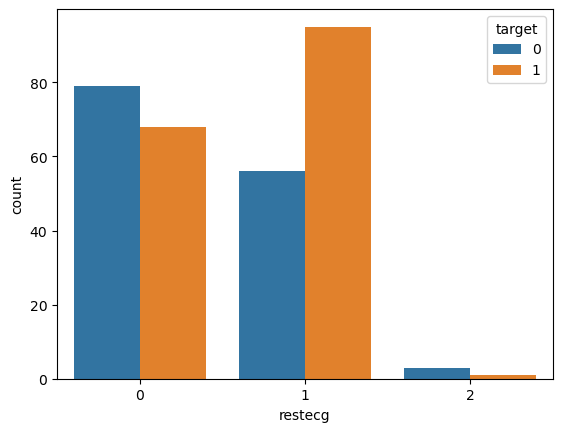

In [42]:
sns.countplot(x='restecg',hue='target',data=df)
plt.show()

Patients who having Hypertropy are more prone to heartattack.

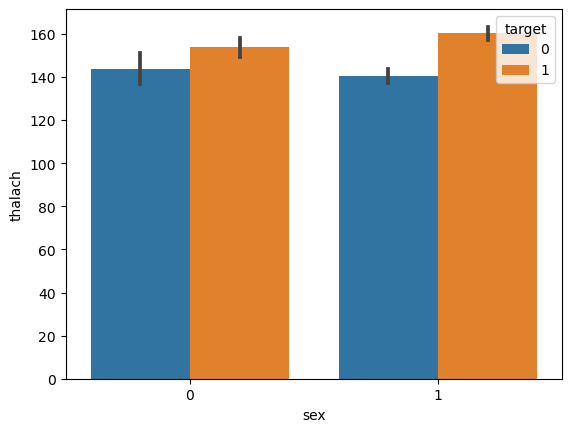

In [43]:
sns.barplot(x='sex',y='thalach',hue='target',data=df)
plt.show()

In both Females and Males heart rate is more at the time of heartattack.

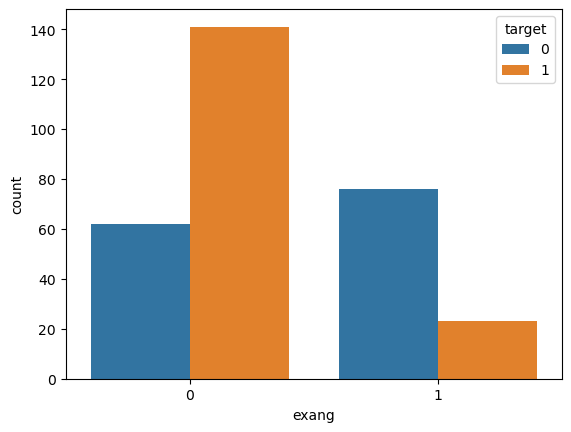

In [44]:
sns.countplot(x='exang',hue='target',data=df)
plt.show()

patients whose exercise induced angina no are more prone to heartattack.

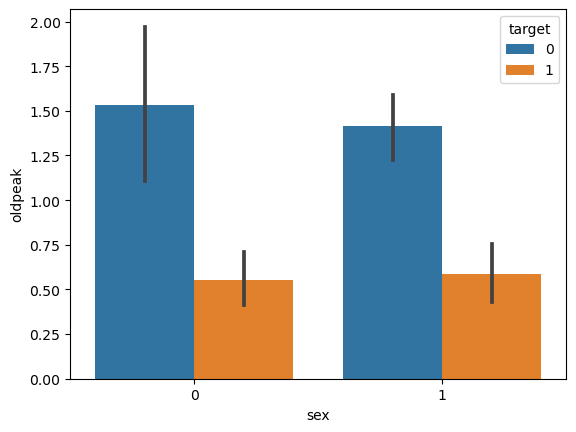

In [45]:
sns.barplot(x='sex',y='oldpeak',hue='target',data=df)
plt.show()

Patients who got heartattack Both Famales and Males are having same ECG plot.

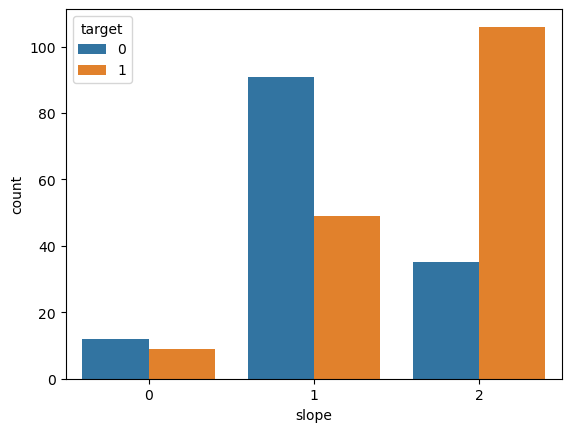

In [46]:
sns.countplot(x='slope',hue='target',data=df)
plt.show()

Patients who having upsloping(2) during test are more prone to heartattack.

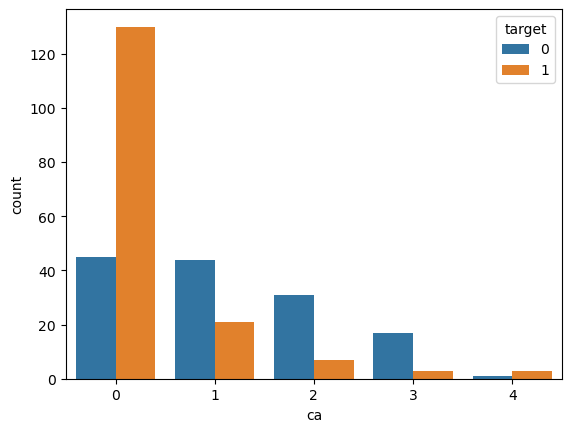

In [47]:
sns.countplot(x='ca',hue='target',data=df)
plt.show()

Patients who having Calcium test score zero(Means no evidence of heart disease before) are still got heartattack.

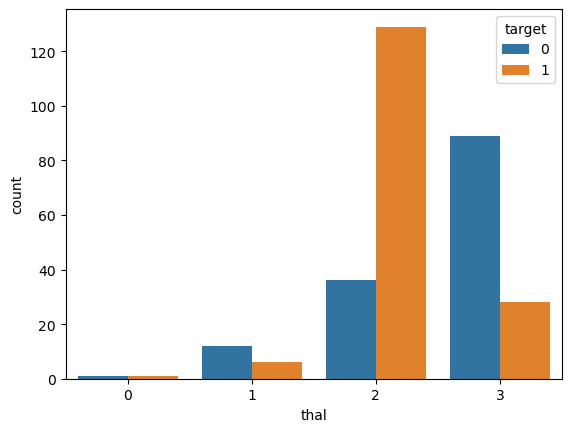

In [48]:
sns.countplot(x='thal',hue='target',data=df)
plt.show()

Patients having normal blood flow before they got heartattack. 

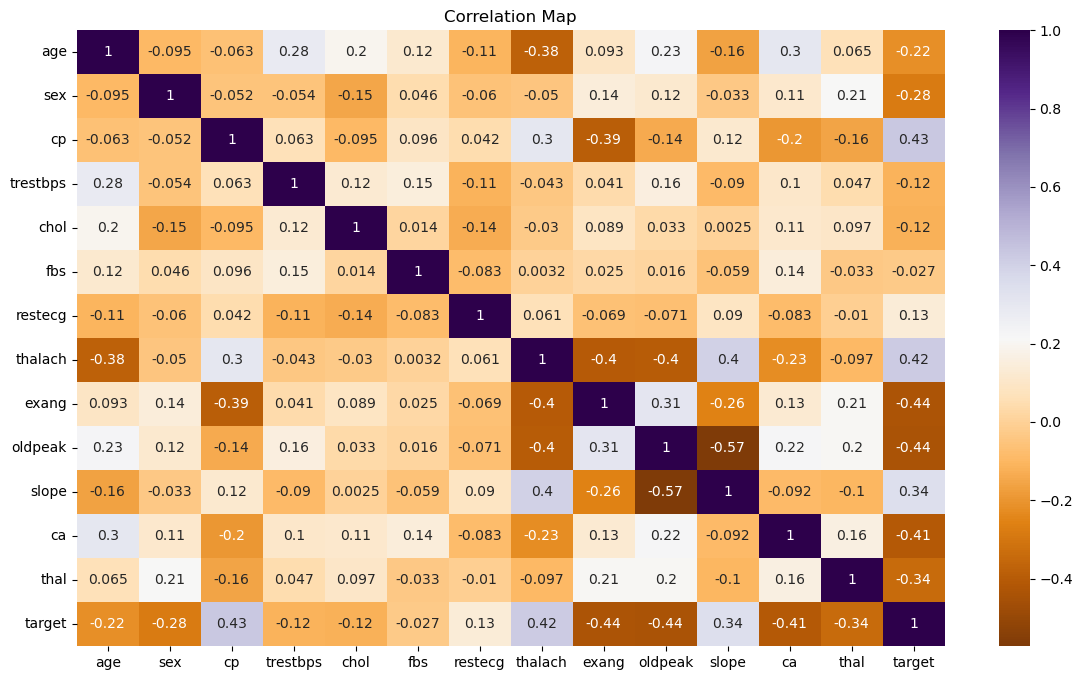

In [49]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,fmt='.2g',cmap='PuOr')
plt.title('Correlation Map')
plt.show()

From the above heatmap we can observe that the features 'cp', 'thalach', 'slope' are highly correlated to Target.

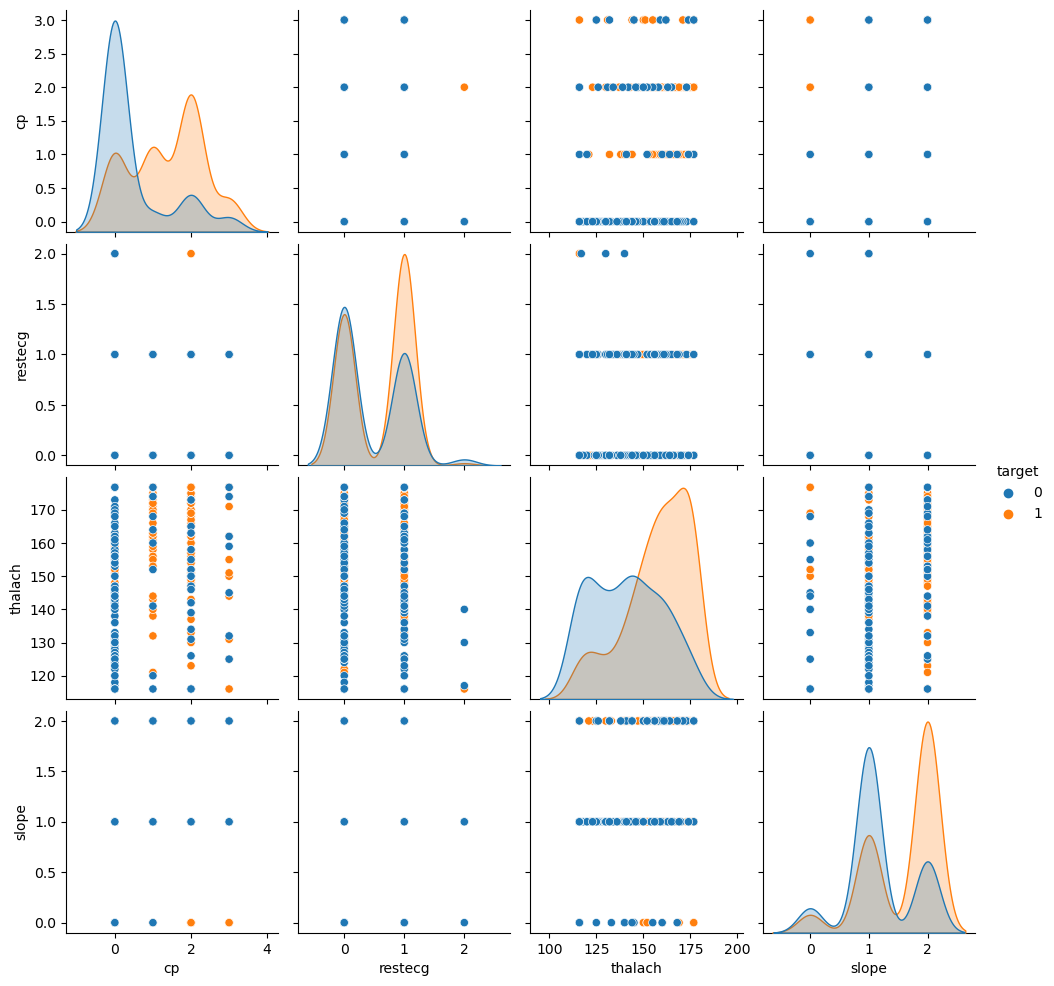

In [50]:
sns.pairplot(df[['cp','restecg','thalach','slope','target']],hue='target')
plt.show()

From the above pair plot we can conclude that our dataset is not linearly separable.

### Conclusion

1.The majority of the patients are older than 40.

2.In the dataset there are 2 times more males than females.

3.56.67% of the patients have a high risk of heart attack, 43.33% - low risk of a heart attack.

4.Age distribution of patients from the high-risk group has a peak at 57-60 ages.

5.Patients that have normal analysis results (such as electrocardiography or thallium stress test) are less likely to have a heart attack.

6.The major factors influencing heart attacks are: Chest pain, Maximum heart rate achieved, Exercise induced angina, ST depression induced by exercise relative to rest and Number of major vessels

# Feature Scaling

In [51]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,176.8,0,2.8,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,176.8,0,0.8,2,0,2,1
4,57,0,0,120.0,308.9,0,1,163.0,1,0.6,2,0,2,1


In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[['trestbps','chol','thalach','oldpeak']] = scaler.fit_transform(df[['trestbps','chol','thalach','oldpeak']])

In [53]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,0.833333,0.370124,1,0,0.559211,0,0.821429,0,0,1,1
1,37,1,2,0.476190,0.511203,0,1,1.000000,0,1.000000,0,0,2,1
2,41,0,1,0.476190,0.129461,0,0,0.921053,0,0.500000,2,0,2,1
3,56,1,1,0.238095,0.395021,0,1,1.000000,0,0.285714,2,0,2,1
4,57,0,0,0.238095,1.000000,0,1,0.773026,1,0.214286,2,0,2,1


# Data Preparation

In [54]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [55]:
X.shape

(302, 13)

In [56]:
y.shape

(302,)

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [58]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((226, 13), (76, 13), (226,), (76,))

# Model Building

## Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [60]:
lr.fit(X_train,y_train)

LogisticRegression()

In [61]:
y_pred = lr.predict(X_test)

In [62]:
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [63]:
from sklearn import metrics

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
a_s = accuracy_score(y_test,y_pred)
print('Accuracy_score: ',a_s)

Accuracy_score:  0.8421052631578947


In [66]:
metrics.confusion_matrix(y_test, y_pred)

array([[29,  6],
       [ 6, 35]], dtype=int64)

In [67]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        35
           1       0.85      0.85      0.85        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



# Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [69]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [70]:
y_prediction = rf.predict(X_test)

In [71]:
acc_sco = accuracy_score(y_test,y_prediction)
print('R_F Accuracy_Score: ',acc_sco)

R_F Accuracy_Score:  0.8421052631578947


In [72]:
print(metrics.classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        35
           1       0.85      0.85      0.85        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



# Hyperparameter Tunning

In [73]:
rf_classifier = RandomForestClassifier(n_estimators=200,max_features=5,criterion='gini')
rf_classifier.fit(X_train, y_train)
y_predic = rf_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_predic))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.86      0.88      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76



In [74]:
from sklearn.model_selection import GridSearchCV

params = {'criterion' : ['gini', 'entropy'],
          'n_estimators' : [150,200],
          'max_features' : [5,10]
         }

grid_search = GridSearchCV(rf_classifier, param_grid= params)

In [75]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(max_features=5, n_estimators=200),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [5, 10], 'n_estimators': [150, 200]})

In [76]:
grid_search.best_params_

{'criterion': 'entropy', 'max_features': 5, 'n_estimators': 150}

In [77]:
best_prediction = grid_search.predict(X_test)

In [78]:
print(metrics.classification_report(y_test,best_prediction))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        35
           1       0.85      0.85      0.85        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76

